In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df_test=pd.read_csv("/Users/kimjong-gyu/Desktop/airbnb-recruiting-new-user-bookings/test_users.csv")
df_train=pd.read_csv("/Users/kimjong-gyu/Desktop/airbnb-recruiting-new-user-bookings/train_users_2.csv")



In [2]:
df_train.columns

Index(['id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser', 'country_destination'],
      dtype='object')

In [3]:
df = pd.concat((df_train,df_test ), axis=0, ignore_index=True)

In [4]:
df.index

RangeIndex(start=0, stop=275547, step=1)

In [5]:
df.isnull().sum()

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         186639
gender                          0
age                        116866
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6085
signup_app                      0
first_device_type               0
first_browser                   0
country_destination         62096
dtype: int64

In [6]:
# first make our target value
df['timestamp_first_active'].unique()
df.dropna(subset=['date_first_booking'],inplace=True)

In [7]:
df.isnull().sum()

id                             0
date_account_created           0
timestamp_first_active         0
date_first_booking             0
gender                         0
age                        20376
signup_method                  0
signup_flow                    0
language                       0
affiliate_channel              0
affiliate_provider             0
first_affiliate_tracked     1738
signup_app                     0
first_device_type              0
first_browser                  0
country_destination            0
dtype: int64

In [8]:
# Target - value 만들기 
# duration ->  date-first-booking(처음 예약한 날짜) 변수와 timestampfirst-active(첫 온라인 활동 날짜 및 시간) 변수의 차이
df['timestamp_first_active'] = df['timestamp_first_active'].astype(str)


In [9]:
df["tfa_date"] = df["timestamp_first_active"].str[0:4] + "-" + df["timestamp_first_active"].str[4:6] + "-" + df["timestamp_first_active"].str[6:8]

df["tfa_date"] = df["tfa_date"].astype('datetime64[ns]')
df["date_first_booking"] = df["date_first_booking"].astype('datetime64[ns]')





In [10]:
from datetime import datetime, timedelta

df['duration']=df['date_first_booking']-df['tfa_date']



In [11]:
df.duration.describe()


count                      88908
mean     44 days 16:36:44.022135
std      88 days 11:35:12.574019
min              0 days 00:00:00
25%              1 days 00:00:00
50%              3 days 00:00:00
75%             29 days 00:00:00
max           1369 days 00:00:00
Name: duration, dtype: object

In [12]:
# 범위를 1년으로 설정 
df["duration"] = df["duration"].astype('string')
df['duration']=df['duration'].str[0:-24]

df['duration'] = df["duration"].astype('int64')
df=df[df['duration']<=365]
df.duration.describe()



count    88872.000000
mean        44.442130
std         87.440598
min          0.000000
25%          1.000000
50%          3.000000
75%         29.000000
max        365.000000
Name: duration, dtype: float64

In [13]:
df.isnull().sum()

id                             0
date_account_created           0
timestamp_first_active         0
date_first_booking             0
gender                         0
age                        20375
signup_method                  0
signup_flow                    0
language                       0
affiliate_channel              0
affiliate_provider             0
first_affiliate_tracked     1738
signup_app                     0
first_device_type              0
first_browser                  0
country_destination            0
tfa_date                       0
duration                       0
dtype: int64

In [14]:
# 중간값을 이용해 Fast 와 slow를 나눈다 .

df['cat_duration']=df['duration']
df.loc[(df['duration']<=2),'cat_duration']='F'
df.loc[(df['duration']>2),'cat_duration']='S'




In [15]:
df.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,tfa_date,duration,cat_duration
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US,2009-12-08,72,S
5,osr2jwljor,2010-01-01,20100101215619,2010-01-02,-unknown-,NaN,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome,US,2010-01-01,1,F
6,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US,2010-01-02,3,S
7,0d01nltbrs,2010-01-03,20100103191905,2010-01-13,FEMALE,47.0,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,US,2010-01-03,10,S
8,a1vcnhxeij,2010-01-04,20100104004211,2010-07-29,FEMALE,50.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US,2010-01-04,206,S


In [16]:
df.age.describe()

count    68497.000000
mean        47.877221
std        146.079673
min          2.000000
25%         28.000000
50%         33.000000
75%         42.000000
max       2014.000000
Name: age, dtype: float64

In [17]:
#1000살 이상을 처리해야한다. 
#처리 안할시 평균값이 커질 수가 있다. 
df.loc[df['age'] > 1000]['age'].describe()

count     374.000000
mean     2010.590909
std        15.971524
min      1924.000000
25%      2014.000000
50%      2014.000000
75%      2014.000000
max      2014.000000
Name: age, dtype: float64

In [18]:
year_error = df['age'] > 1000
df.loc[year_error, 'age'] = 2015 - df.loc[year_error, 'age']

In [19]:
df.age.describe()

count    68497.000000
mean        36.923281
std         13.988332
min          1.000000
25%         28.000000
50%         33.000000
75%         42.000000
max        150.000000
Name: age, dtype: float64

In [20]:
#10~80세 범위만 따지기 위해
df.loc[df.age > 80, 'age'] = np.nan
df.loc[df.age < 10, 'age'] = np.nan

In [21]:
df['age'].unique()

array([41., nan, 46., 47., 50., 36., 33., 31., 29., 30., 40., 26., 32.,
       35., 37., 42., 44., 34., 19., 52., 57., 49., 54., 28., 69., 43.,
       39., 25., 65., 38., 63., 18., 45., 60., 48., 51., 61., 64., 70.,
       67., 55., 73., 66., 68., 27., 53., 58., 75., 59., 79., 62., 72.,
       56., 24., 74., 23., 71., 21., 15., 22., 78., 77., 17., 20., 80.,
       76., 16.])

In [22]:
#평균값으로 채워준다. 
mean_age=df['age'].mean()
df['age'].fillna(mean_age,inplace=True)


In [23]:
df.isnull().sum()

id                            0
date_account_created          0
timestamp_first_active        0
date_first_booking            0
gender                        0
age                           0
signup_method                 0
signup_flow                   0
language                      0
affiliate_channel             0
affiliate_provider            0
first_affiliate_tracked    1738
signup_app                    0
first_device_type             0
first_browser                 0
country_destination           0
tfa_date                      0
duration                      0
cat_duration                  0
dtype: int64

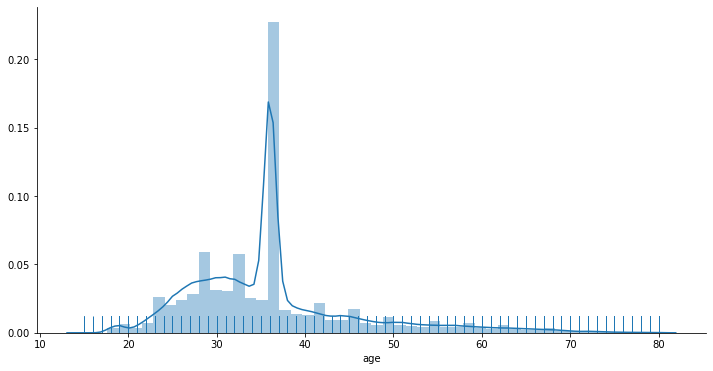

In [24]:
## 나이 결과값을 시각적 그래프로 그렸을때의 모습
plt.figure(figsize=(12,6))
sns.distplot(df.age, rug=True)
sns.despine()

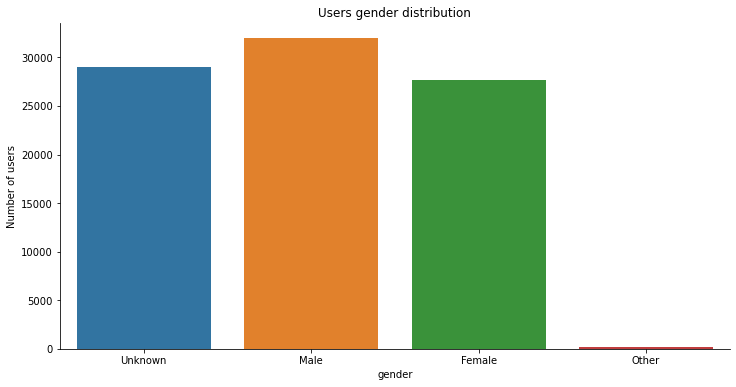

In [25]:
#Gender 처리 
plt.figure(figsize=(12,6))
df["gender"] = df['gender'].fillna('M')
sns.countplot(data=df, x='gender')
plt.xticks(np.arange(4), ("Unknown", "Male", "Female", "Other"))
plt.ylabel('Number of users')
plt.title('Users gender distribution')
sns.despine()

In [26]:
import random
Gend=['MALE','FEMALE']
df['gender']=df['gender'].map(lambda x:random.choice(Gend) if x== '-unknown-' else x)



In [27]:
df['gender'].unique()

array(['MALE', 'FEMALE', 'OTHER'], dtype=object)

In [28]:
df.gender.replace('OTHER', np.nan, inplace=True)
df.dropna(subset=['gender'],inplace=True)

In [29]:
df['gender'].unique()

array(['MALE', 'FEMALE'], dtype=object)

In [30]:
df.isnull().sum()

id                            0
date_account_created          0
timestamp_first_active        0
date_first_booking            0
gender                        0
age                           0
signup_method                 0
signup_flow                   0
language                      0
affiliate_channel             0
affiliate_provider            0
first_affiliate_tracked    1738
signup_app                    0
first_device_type             0
first_browser                 0
country_destination           0
tfa_date                      0
duration                      0
cat_duration                  0
dtype: int64

In [31]:
# first_affiliate_tracked 결측치 제거 
df.dropna(subset=['first_affiliate_tracked'], inplace=True)


In [32]:
df.isnull().sum()

id                         0
date_account_created       0
timestamp_first_active     0
date_first_booking         0
gender                     0
age                        0
signup_method              0
signup_flow                0
language                   0
affiliate_channel          0
affiliate_provider         0
first_affiliate_tracked    0
signup_app                 0
first_device_type          0
first_browser              0
country_destination        0
tfa_date                   0
duration                   0
cat_duration               0
dtype: int64

In [33]:
df.to_csv("/Users/kimjong-gyu/Desktop/airbnb-recruiting-new-user-bookings/df.csv")

